In [60]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('WholesaleCustomersData.csv')

In [3]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [25]:
df['Channel'].nunique()

2

In [32]:
df.shape

(440, 9)

### Define training Data

In [6]:
X = df.iloc[:, 2:].values
X = np.ascontiguousarray(X)

In [7]:
print(X)

[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 ...
 [14531 15488 30243   437 14841  1867]
 [10290  1981  2232  1038   168  2125]
 [ 2787  1698  2510    65   477    52]]


### Scatter plot

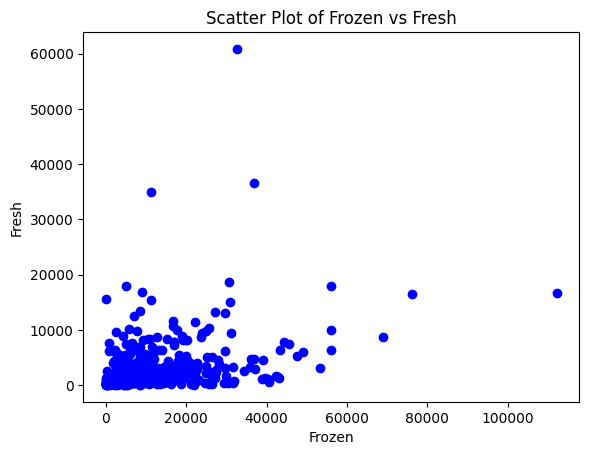

In [27]:
plt.scatter(X[:, 0],  X[:,3], c='blue')
plt.xlabel('Frozen')
plt.ylabel('Fresh')
plt.title('Scatter Plot of Frozen vs Fresh')
plt.show()

### Using KMeans Cluster

In [14]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
inertia = kmeans.inertia_ 
print(f'inertia: {inertia}')

inertia: 1644.059851234756


#### Optimize Model

k = 1, Inertia: 2640.00
k = 2, Inertia: 1956.12
k = 3, Inertia: 1657.97
k = 4, Inertia: 1356.96
k = 5, Inertia: 1061.00
k = 6, Inertia: 945.54
k = 7, Inertia: 854.43
k = 8, Inertia: 767.78
k = 9, Inertia: 666.22
k = 10, Inertia: 638.68


Text(0, 0.5, 'SSE')

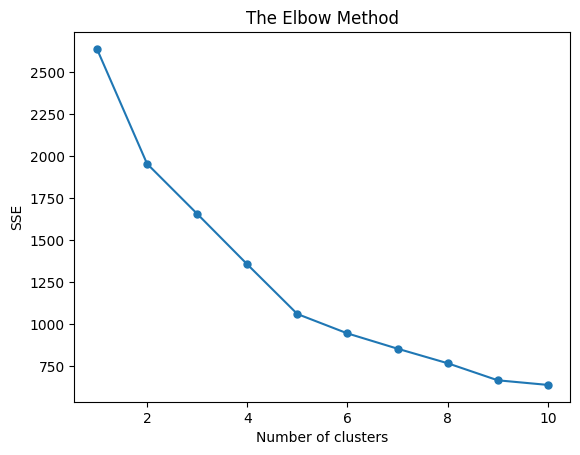

In [65]:
inertia = []
for i in range(1,11):
    modelKM = KMeans(n_clusters=i, random_state=0)
    modelKM.fit(X_scaled)
    inertia.append(modelKM.inertia_)
    print(f"k = {i}, Inertia: {inertia[-1]:.2f}")

import matplotlib.pyplot as plt
plt.plot(range(1,11), inertia, marker = '.', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') 

Text(0, 0.5, 'Fresh')

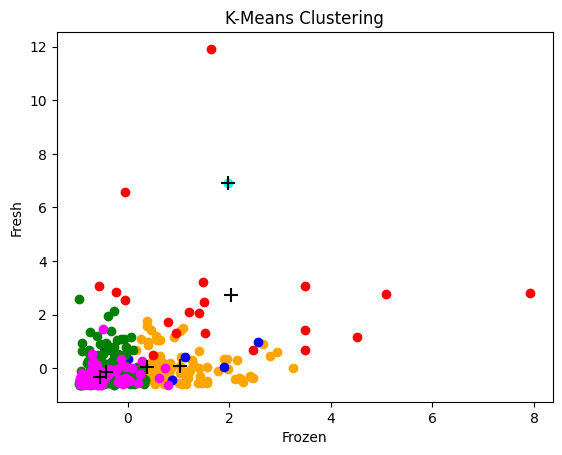

In [81]:
n_clusters = 6
modelKM = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = modelKM.fit_predict(X_scaled)
centres = modelKM.cluster_centers_

colors = ['orange', 'blue', 'green', 'magenta', 'cyan', 'red']
for i in range(6):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 3], c=colors[i])
plt.scatter(modelKM.cluster_centers_[:, 0], modelKM.cluster_centers_[:, 3], color='black', marker='+', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Frozen')
plt.ylabel('Fresh')

In [82]:
# Analyze clusters by Channel and Region to get better insight into the data
channel_counts = df.groupby(['Cluster', 'Channel']).size().unstack()
region_counts = df.groupby(['Cluster', 'Region']).size().unstack()

print("Channel Distribution by Cluster:")
print(channel_counts)

print("\nRegion Distribution by Cluster:")
print(region_counts)

Channel Distribution by Cluster:
Channel      1     2
Cluster             
0         75.0  20.0
1          NaN  11.0
2        193.0  28.0
3          9.0  83.0
4          1.0   NaN
5         20.0   NaN

Region Distribution by Cluster:
Region      1     2      3
Cluster                   
0        15.0  10.0   70.0
1         2.0   1.0    8.0
2        40.0  23.0  158.0
3        17.0  12.0   63.0
4         NaN   NaN    1.0
5         3.0   1.0   16.0


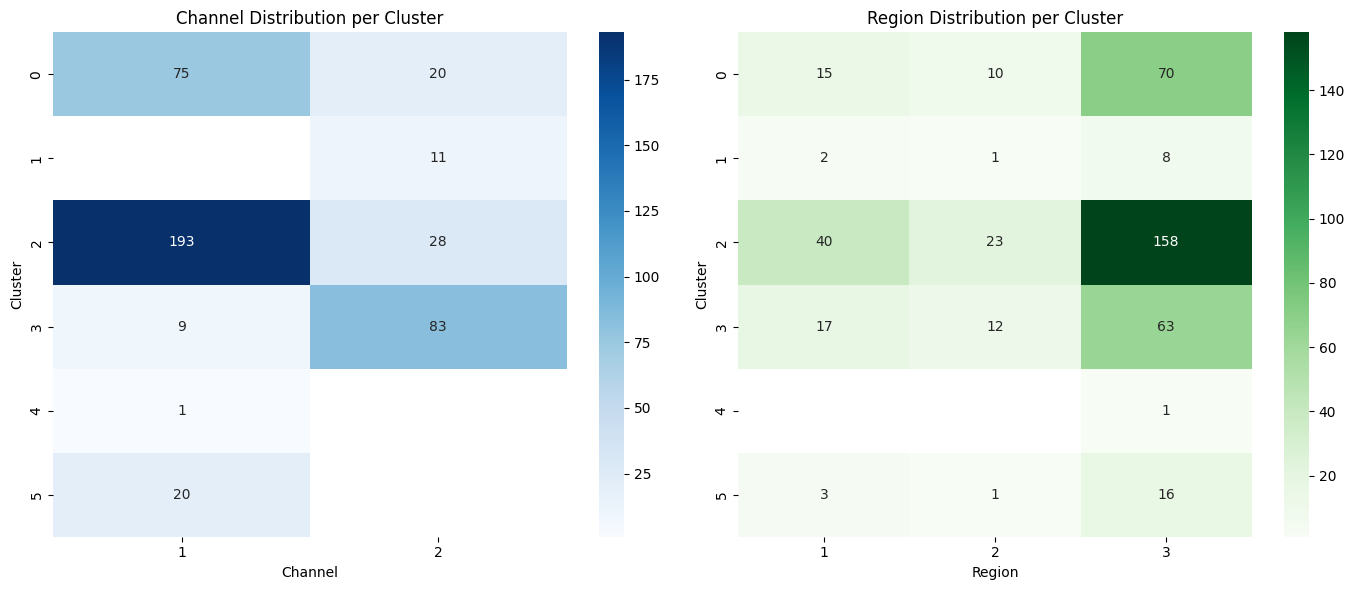

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Channel heatmap
sns.heatmap(channel_counts, annot=True, fmt='.0f', cmap='Blues', ax=axes[0])
axes[0].set_title('Channel Distribution per Cluster')
axes[0].set_xlabel('Channel')
axes[0].set_ylabel('Cluster')

# Region heatmap
sns.heatmap(region_counts, annot=True, fmt='.0f', cmap='Greens', ax=axes[1])
axes[1].set_title('Region Distribution per Cluster')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Cluster')

# Tight layout to prevent overlap
plt.tight_layout()
plt.show()

### Hierarchical Clustering

In [85]:
# SciKitLearn Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
model5 = AgglomerativeClustering(n_clusters =5, linkage ='ward')
y5 = model5.fit_predict(X_scaled)

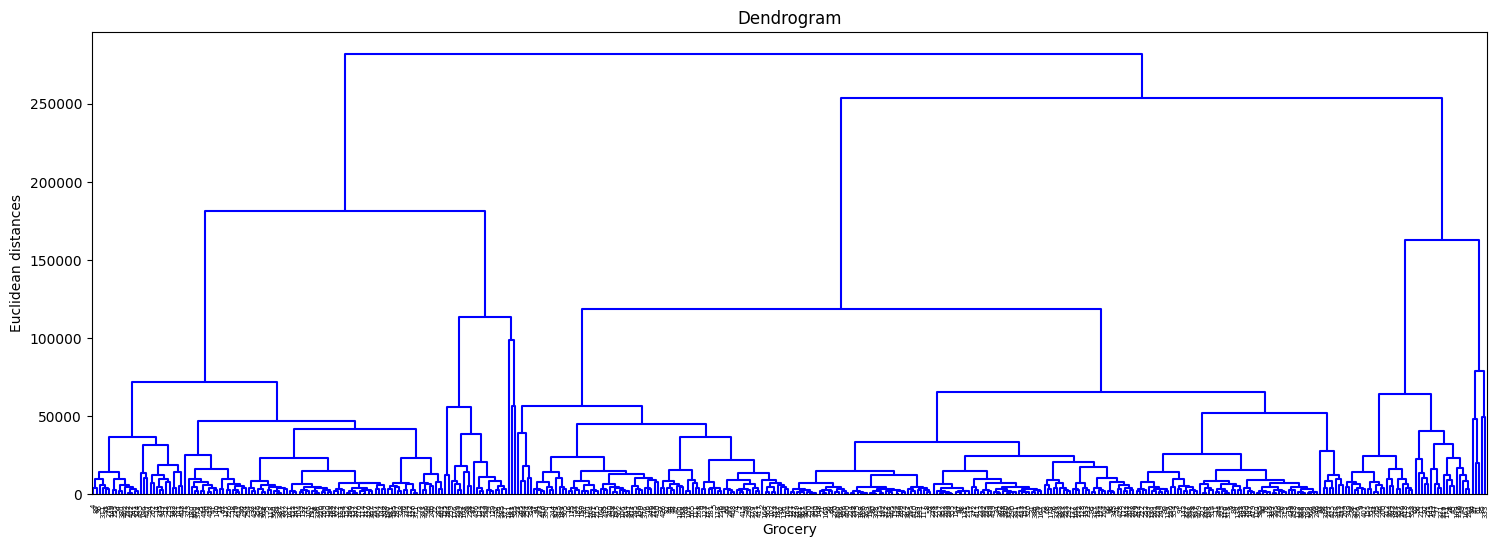

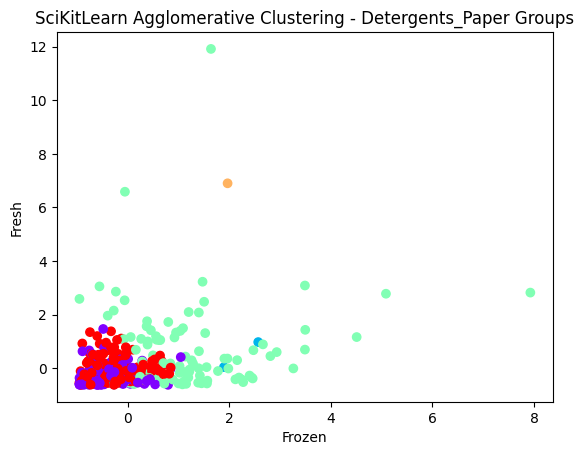

In [87]:
import scipy.cluster.hierarchy as sch


#SciPy Dendogram
plt.figure(figsize=(18,6))
plt.title('Dendrogram')
plt.xlabel('Grocery')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method ='ward'),
                            color_threshold=200, 
                            above_threshold_color='blue') 
plt.show()


plt.scatter(X_scaled[:, 0], X_scaled[:, 3], c=y5, cmap="rainbow")
plt.xlabel('Frozen')
plt.ylabel('Fresh')
plt.title("SciKitLearn Agglomerative Clustering - Fresh-Frozen Groups")
plt.show()

In [88]:
#Predict the cluster labels from the SciPy Dendogram, like shown above
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

max_d = 200
clusters_dendo = fcluster(sch.linkage(X, method ='ward'), 
                          max_d, criterion='distance')
clusters_dendo

array([193, 144, 220, 343,   1, 199, 360, 204, 263, 400, 175, 355,  24,
        40,  23, 380, 151, 280,  46, 203,  35, 230, 111, 139,  19,  33,
       375,  68, 427, 124,  47, 297,  50,   3, 285, 161,   6, 180, 402,
       118, 106,  37, 187, 405, 182, 428, 407, 436, 183, 433, 233, 324,
       127, 153,   9, 264, 421, 143,  70, 207, 202, 437, 218, 188, 234,
       422, 323,  41, 301, 386,  99,  49, 303, 108, 206,  56, 304, 423,
       370, 299, 246, 155, 184,  58, 361, 439, 438, 131, 388,   2, 372,
       344, 418, 395, 142, 316, 321, 272, 273, 338, 185, 158, 214, 120,
        66,  69, 168, 189, 310, 435, 368, 190, 103,  79,  85, 371, 357,
       265,  57, 339,  88, 221,  63, 194, 121, 112, 101,  42, 315, 125,
       334, 275,  67, 383, 254, 249, 216, 312, 362, 261,  38,  28,  26,
       345,  92, 426, 255, 364, 232,   7,  75, 293,  81, 313, 274, 403,
       171,  83, 164, 157, 163,  65,  77, 431, 217, 192, 212, 300, 244,
       231, 156, 429, 326, 414, 318, 152, 116, 195, 197, 302,  3

### Save model to file for deliverable

In [89]:
# Save the model to disk
filename = 'WholsalesProject'
pickle.dump(modelKM, open(filename, 'wb'))

In [90]:
# Load the model at some point in the future
spending1 = pickle.load(open('WholsalesProject','rb'))

In [ ]:
# Run the loaded model on some data.
# I didn't create and load new data here, so just using X again
grocery.predict(X)